In [1]:
import numpy as np
import numpy.fft as fft

import matplotlib.pyplot as plt
import skimage.color as color
import skimage.filters as flt 

# Image filtering 

We repeat the same procedure of 1D filtering in the case of 2D images. The starting domain is space (2D, image plane)

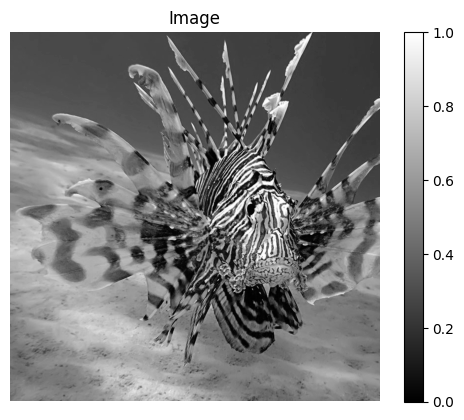

In [2]:
#LOAD IMAGE (you may also try others)
img = plt.imread('images/lionfish.jpg')
img = color.rgb2gray(img);
img = img[0:img.shape[0],0:img.shape[0]] # NOTICE for the 2D-DFT to work, the image must be squared

plt.imshow(img,cmap='gray'); plt.axis('off');plt.title('Image')
plt.colorbar();


## Filtering in Fourier

As an example, we start by applying a low pass (Gaussian) filtering in Fourier.  

Remember we might obtain similar results filtering in space, by means of a convolution with a Gaussian mask.

Notice the smoothing effect of the Gaussian filter and appreciate how the results are affected by different choices of $\sigma$

In this lab we proceed differently than in previous hands-on, and we build "by hand" our Gaussian filter:
- build a 1D filter   by an appropriate sampling of the Gaussian function in a given range of values
- multiply two 1D filters obtaining a 2D one (this is thanks to a <i> separability </i> property of the Gaussian


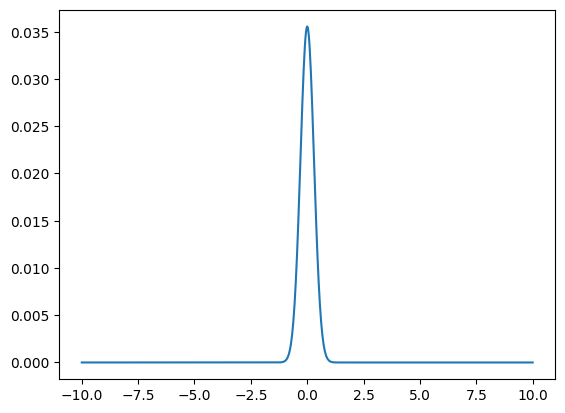

In [42]:
#  BUILD A 1D GAUSSIAN FILTER

# First a 1-D  Gaussian in space
t = np.linspace(-10, 10, img.shape[0])
sigma = 0.3
bump = np.exp(-t**2/(2.*sigma**2)) #formula per la Gaussiana
bump /= np.trapezoid(bump) # normalizzo dividendo la Gaussiana per l'integrale della funzione, in modo che l'area sotto la curva sia uguale a 1.
plt.plot(t,bump)

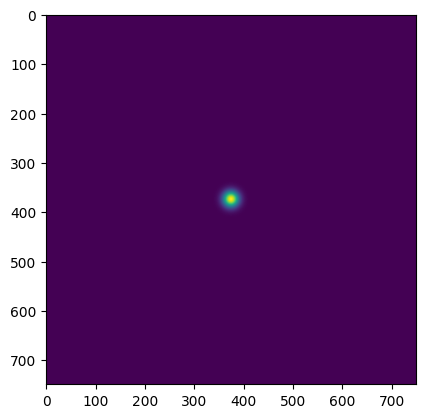

In [43]:
# BUILD A 2D GAUSSIAN FILTER
#Estendo il filtro precedente a due dimensioni moltiplicando per la sua trasposta
#Minore è la dimensione del filtro più meno è sfocata l'immagine --> Ringing (?)
gauss = bump[:, np.newaxis] * bump[np.newaxis, :]
plt.imshow(gauss) #mostro il grafico

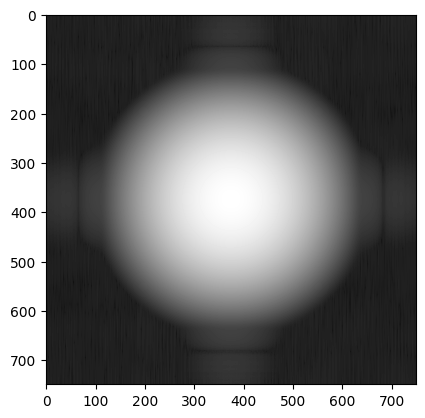

In [40]:
# Filter Fourier Transform
gauss_F = fft.fft2(gauss) # Calcola la trasformata di Fourier bidimensionale del filtro gaussiano


# plot output (shift and contrast enhancement to "read" it better
plt.figure()
plt.imshow( np.log10(np.abs(fft.fftshift(gauss_F))),cmap='gray') 

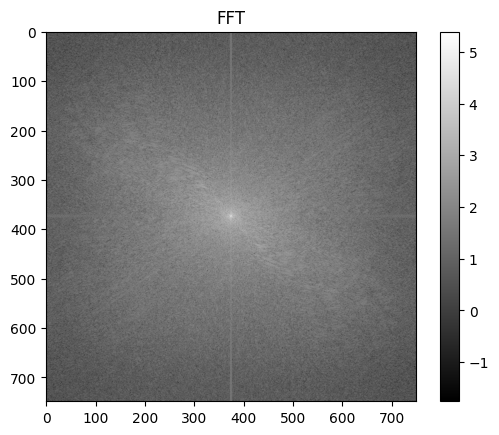

In [36]:
# FFT of the signal (image)
Img = (fft.fft2(img))

plt.imshow(np.log10(np.abs(fft.fftshift(Img))),cmap='gray') 
plt.title('FFT')
plt.colorbar()



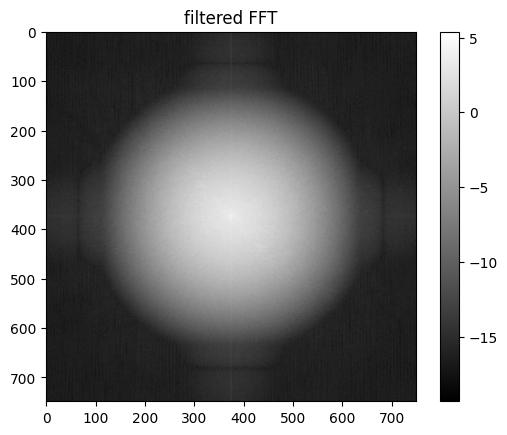

In [37]:
#FILTER in FOURIER
G=np.multiply(gauss_F,Img);
plt.imshow(np.log10(np.abs(fft.fftshift(G))),cmap='gray') 
plt.title('filtered FFT')
plt.colorbar()

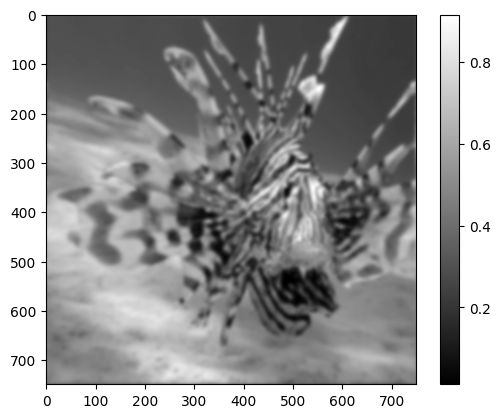

In [41]:
#INVERSE
im_rec= np.real(fft.ifftshift(fft.ifft2(G)))
plt.imshow(im_rec,cmap='gray'); 
plt.colorbar()

## Filtering in space
In this case we design an enhancement (high pass) filter in space

We consider two alternatives
- a 1D convolution first along the rows and then the columns
- convolution with a 2D filter

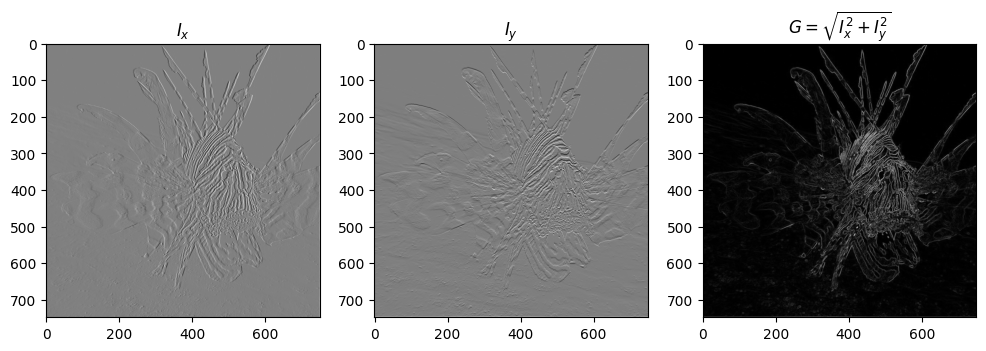

In [10]:
from scipy import signal
from matplotlib import cm

# Partial derivatives kernel
k = np.array([-0.5, 0, 0.5])

# Compute first derivative along x
Ix = np.zeros_like(img)
for i, r in enumerate(img):
        Ix[i, :] = signal.convolve(r, k, mode='same')

# Compute first derivative along y
Iy = np.zeros_like(img)
for i, c in enumerate(img.T):
        Iy[:, i] = signal.convolve(c, k, mode='same')

# Compute the mangnitude of the gradient
G = np.sqrt(Ix**2 + Iy**2)

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(Ix, cmap=cm.gist_gray)
plt.title(r'$I_x$')
plt.subplot(132)
plt.imshow(Iy, cmap=cm.gist_gray)
plt.title(r'$I_y$')
plt.subplot(133)
plt.imshow(G, cmap=cm.gist_gray)
plt.title(r'$G = \sqrt{I_x^2+I_y^2}$')
plt.tight_layout;

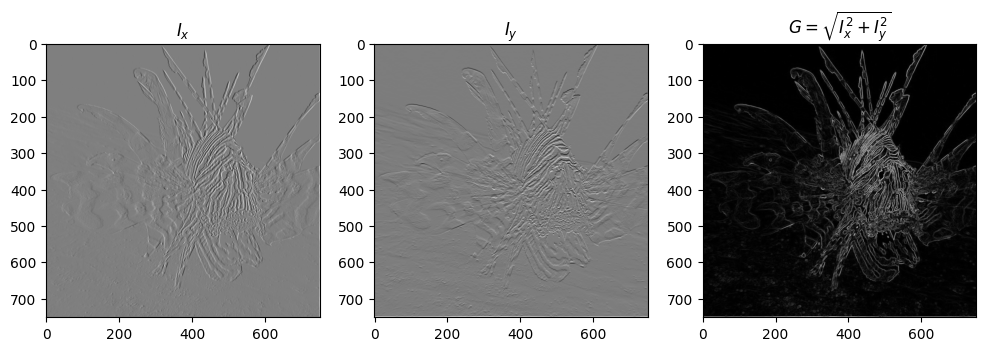

In [11]:
# Partial derivatives kernel
k = np.array([[-1,-2,-1],[0, 0,0],[1,2,1]])

Ix =signal.convolve2d(img, k.T)
Iy = signal.convolve2d(img,k) 

# Compute the mangnitude of the gradient
G = np.sqrt(Ix**2 + Iy**2)

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(Ix, cmap=cm.gist_gray)
plt.title(r'$I_x$')
plt.subplot(132)
plt.imshow(Iy, cmap=cm.gist_gray)
plt.title(r'$I_y$')
plt.subplot(133)
plt.imshow(G, cmap=cm.gist_gray)
plt.title(r'$G = \sqrt{I_x^2+I_y^2}$')
plt.tight_layout;

 ## Wrapping up
 - We explored other examples of signal filtering, this time in 2D
 - Again, reason on the role of the filter parameters ($\sigma$ for the Gaussian) and how it is different in space and Fourier. It is not included in the hands-on but we recommend you apply a smoothing / low pass Gaussian filter to the image with convolution
 - Did you get an intuition of the meaning of $I_x$ and $I_y$?
 - What would it be an appropriate high pass filter in Fourier?
 - How do I detect points of high intensity level variations?

In [ ]:
# 